In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import glob
import geopandas as gp
plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['figure.facecolor']='w'
plt.rcParams['font.family']= 'serif'
import warnings
warnings.filterwarnings('ignore')

In [21]:
chicago_shp = '../data_misc/chicago_shapefile/geo_export_2702d908-a4db-4dc5-a4de-78a5f3f67445.shp'
chicago_shp = '../data_misc/chicago_shapefile/geo_export_ec346dbb-8c11-44b4-be04-0301ae3f9c64.shp'
chicago = gp.read_file(chicago_shp)
chicago.geoid10 = chicago.geoid10.apply(np.int64)
chicago

,commarea,commarea_n,countyfp10,geoid10,name10,namelsad10,notes,statefp10,tractce10,geometry
0,44,44.0,031,17031842400,8424,Census Tract 8424,None,17,842400,"POLYGON ((-87.62405 41.73022, -87.62405 41.730..."
1,59,59.0,031,17031840300,8403,Census Tract 8403,None,17,840300,"POLYGON ((-87.68608 41.82296, -87.68607 41.823..."
2,34,34.0,031,17031841100,8411,Census Tract 8411,None,17,841100,"POLYGON ((-87.62935 41.85280, -87.62934 41.852..."
3,31,31.0,031,17031841200,8412,Census Tract 8412,None,17,841200,"POLYGON ((-87.68813 41.85569, -87.68816 41.856..."
4,32,32.0,031,17031839000,8390,Census Tract 8390,None,17,839000,"POLYGON ((-87.63312 41.87449, -87.63306 41.874..."
...,...,...,...,...,...,...,...,...,...,...
796,7,7.0,031,17031070400,704,Census Tract 704,None,17,070400,"POLYGON ((-87.65746 41.93258, -87.65722 41.932..."
797,7,7.0,031,17031070500,705,Census Tract 705,None,17,070500,"POLYGON ((-87.66349 41.93036, -87.66350 41.930..."
798,13,13.0,031,17031130300,1303,Census Tract 1303,None,17,130300,"POLYGON ((-87.71436 41.98300, -87.71472 41.982..."
799,29,29.0,031,17031292200,2922,Census Tract 2922,None,17,292200,"POLYGON ((-87.71317 41.85523, -87.71357 41.855..."


In [22]:
crime_df = pd.read_csv('Crimes_-_Map.csv', usecols=[' PRIMARY DESCRIPTION', 
                                                    'WARD', 
                                                    'LATITUDE', 
                                                    'LONGITUDE', 
                                                    'DATE  OF OCCURRENCE'],
                       parse_dates=True,
                       index_col='DATE  OF OCCURRENCE')
crime_df.dropna(inplace=True)
crime_df

,PRIMARY DESCRIPTION,WARD,LATITUDE,LONGITUDE
DATE OF OCCURRENCE,,,,
2021-06-15 09:30:00,THEFT,8.0,41.748486,-87.602675
2021-06-15 07:50:00,ASSAULT,28.0,41.880661,-87.731186
2021-06-15 21:01:00,ASSAULT,24.0,41.871540,-87.705839
2021-06-15 07:47:00,HOMICIDE,16.0,41.780851,-87.649674
2021-06-15 01:55:00,OTHER OFFENSE,24.0,41.859989,-87.735995
...,...,...,...,...
2021-12-30 02:10:00,DECEPTIVE PRACTICE,2.0,41.902703,-87.629950
2021-12-25 00:00:00,DECEPTIVE PRACTICE,21.0,41.731960,-87.636205
2021-12-23 08:00:00,THEFT,26.0,41.904582,-87.714655


In [23]:
crime_df = gp.GeoDataFrame(
    crime_df, geometry=gp.points_from_xy(crime_df.LONGITUDE, crime_df.LATITUDE)
)

In [24]:
crime_df.head()

,PRIMARY DESCRIPTION,WARD,LATITUDE,LONGITUDE,geometry
DATE OF OCCURRENCE,,,,,
2021-06-15 09:30:00,THEFT,8.0,41.748486,-87.602675,POINT (-87.60268 41.74849)
2021-06-15 07:50:00,ASSAULT,28.0,41.880661,-87.731186,POINT (-87.73119 41.88066)
2021-06-15 21:01:00,ASSAULT,24.0,41.871540,-87.705839,POINT (-87.70584 41.87154)
2021-06-15 07:47:00,HOMICIDE,16.0,41.780851,-87.649674,POINT (-87.64967 41.78085)
2021-06-15 01:55:00,OTHER OFFENSE,24.0,41.859989,-87.735995,POINT (-87.73599 41.85999)


In [25]:
np.unique(crime_df[' PRIMARY DESCRIPTION'])

array(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIMINAL DAMAGE',
       'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON-CRIMINAL', 'OBSCENITY', 'OFFENSE INVOLVING CHILDREN',
       'OTHER NARCOTIC VIOLATION', 'OTHER OFFENSE', 'PROSTITUTION',
       'PUBLIC INDECENCY', 'PUBLIC PEACE VIOLATION', 'ROBBERY',
       'SEX OFFENSE', 'STALKING', 'THEFT', 'WEAPONS VIOLATION'],
      dtype=object)

In [6]:
crimes_of_interest = ['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
                      'CONCEALED CARRY LICENSE VIOLATION', 'CRIMINAL DAMAGE',
                      'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
                      'HOMICIDE', 'HUMAN TRAFFICKING',
                      'INTIMIDATION', 'KIDNAPPING',
                      'MOTOR VEHICLE THEFT', 'NARCOTICS',
                      'OBSCENITY', 'OFFENSE INVOLVING CHILDREN',
                      'OTHER NARCOTIC VIOLATION', 'PROSTITUTION',
                      'PUBLIC INDECENCY', 'PUBLIC PEACE VIOLATION', 'ROBBERY',
                      'SEX OFFENSE', 'STALKING', 'THEFT', 'WEAPONS VIOLATION']

In [7]:
violent_crimes = ['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
                      'CRIMINAL SEXUAL ASSAULT',
                      'HOMICIDE',
                      'INTIMIDATION', 'KIDNAPPING','NARCOTICS']

In [8]:
coi = lambda x: x in crimes_of_interest

In [9]:
violent = lambda x: x in violent_crimes

In [10]:
crime_df['to_count'] = crime_df[' PRIMARY DESCRIPTION'].apply(coi)
crime_df['is_violent'] = crime_df[' PRIMARY DESCRIPTION'].apply(violent)
crime_df = crime_df[crime_df.to_count == True]
crime_df.head()

,PRIMARY DESCRIPTION,WARD,LATITUDE,LONGITUDE,geometry,to_count,is_violent
DATE OF OCCURRENCE,,,,,,,
2021-06-15 09:30:00,THEFT,8.0,41.748486,-87.602675,POINT (-87.60268 41.74849),True,False
2021-06-15 07:50:00,ASSAULT,28.0,41.880661,-87.731186,POINT (-87.73119 41.88066),True,True
2021-06-15 21:01:00,ASSAULT,24.0,41.871540,-87.705839,POINT (-87.70584 41.87154),True,True
2021-06-15 07:47:00,HOMICIDE,16.0,41.780851,-87.649674,POINT (-87.64967 41.78085),True,True
2021-06-15 09:20:00,BATTERY,1.0,41.893909,-87.660781,POINT (-87.66078 41.89391),True,True


In [11]:
dfsjoin = gp.sjoin(chicago, crime_df) #Spatial join Points to polygons

In [12]:
n_crimes = dfsjoin[['geoid10','to_count']].groupby('geoid10').sum()
n_violent = dfsjoin[['geoid10','is_violent']].groupby('geoid10').sum()
new_crime_df = n_crimes.merge(n_violent, on='geoid10')

In [13]:
chicago_crime = chicago.merge(new_crime_df, on='geoid10')
chicago_crime.rename(columns={'to_count':'crime_count'},inplace=True)
chicago_crime.head()

,commarea,commarea_n,countyfp10,geoid10,name10,namelsad10,notes,statefp10,tractce10,geometry,crime_count,is_violent
0,44,44.0,031,17031842400,8424,Census Tract 8424,None,17,842400,"POLYGON ((-87.62405 41.73022, -87.62405 41.730...",731,301
1,59,59.0,031,17031840300,8403,Census Tract 8403,None,17,840300,"POLYGON ((-87.68608 41.82296, -87.68607 41.823...",147,63
2,34,34.0,031,17031841100,8411,Census Tract 8411,None,17,841100,"POLYGON ((-87.62935 41.85280, -87.62934 41.852...",481,130
3,31,31.0,031,17031841200,8412,Census Tract 8412,None,17,841200,"POLYGON ((-87.68813 41.85569, -87.68816 41.856...",274,119
4,32,32.0,031,17031839000,8390,Census Tract 8390,None,17,839000,"POLYGON ((-87.63312 41.87449, -87.63306 41.874...",558,154


<AxesSubplot:>

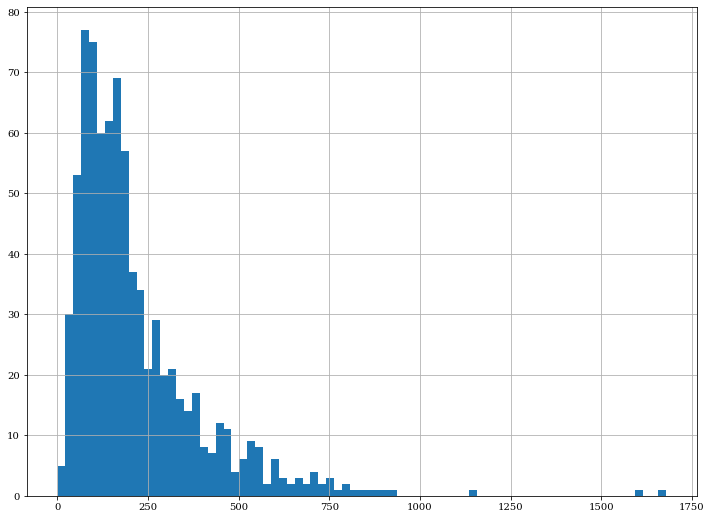

In [14]:
chicago_crime.crime_count.hist(bins=77)

<AxesSubplot:>

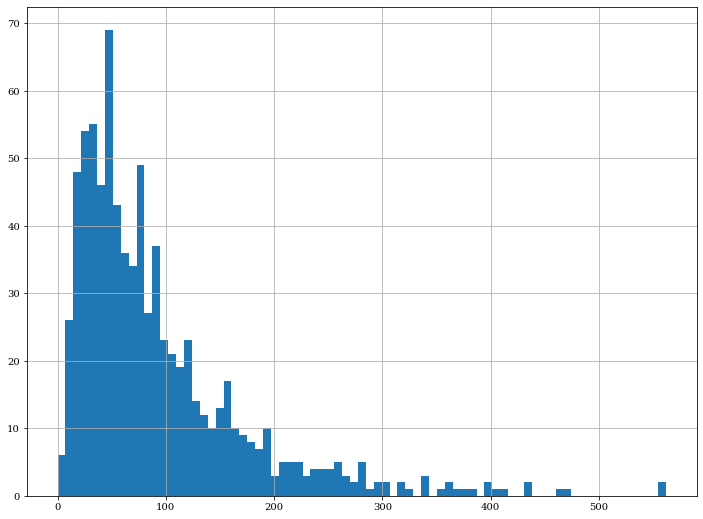

In [15]:
chicago_crime.is_violent.hist(bins=77)

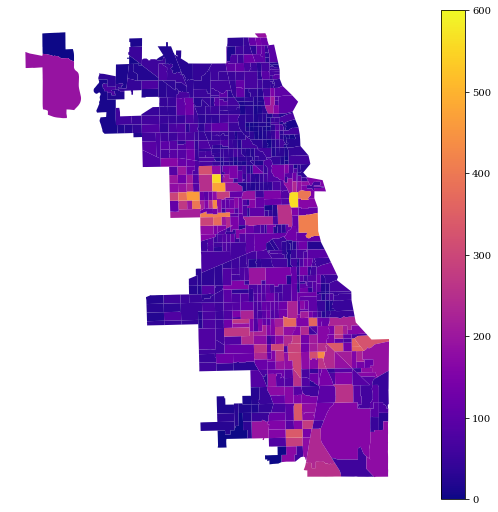

In [16]:
ax = chicago_crime.plot(column='is_violent', cmap='plasma',vmax=600, legend=True)
ax.set_axis_off()
# chicago_crime.plot(ax=ax,column='commarea_n', alpha=0.2,vmax=77, cmap='jet', legend=True)

Text(0.5, 1.0, 'Number of Crimes by Census Tract \n 2021')

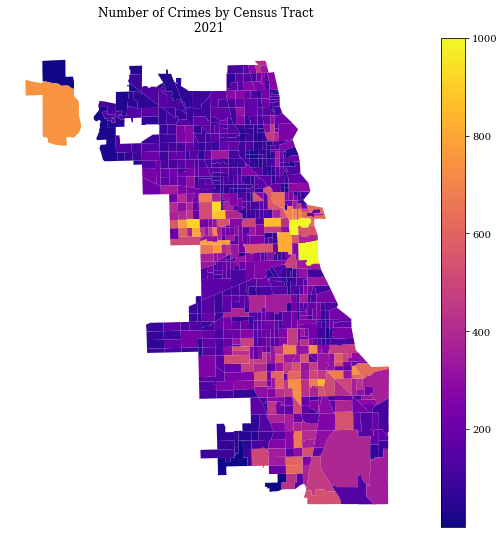

In [17]:
ax = chicago_crime.plot(column='crime_count', cmap='plasma',vmax=1000, legend=True)
ax.set_axis_off()
ax.set_title('Number of Crimes by Census Tract \n 2021')

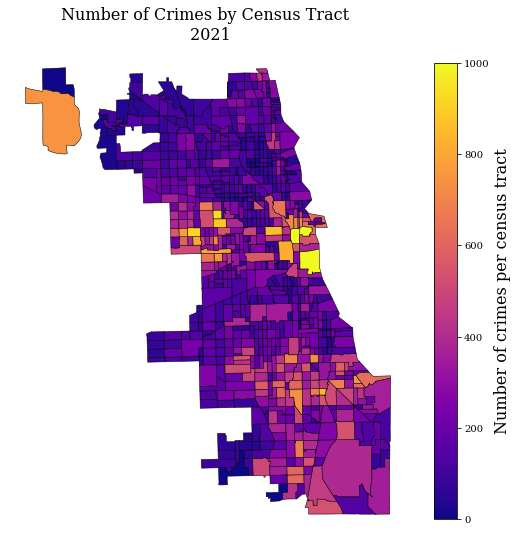

In [18]:
import matplotlib.colors as colors
fig, ax = plt.subplots(figsize=(9,12))
norm = colors.Normalize(vmin=0, vmax=1000)
cmap = 'plasma'
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
chicago_crime.plot(ax=ax, edgecolor='k',column='crime_count', norm=norm, cmap=cmap, legend=False, lw=0.5)
ax_cbar = fig.colorbar(cbar, ax=ax, shrink=0.7)
ax_cbar.set_label(r'Number of crimes per census tract', fontsize=16)
# counties.centroid.plot(ax=ax, color='tab:red')
ax.set_title('Number of Crimes by Census Tract \n 2021', fontsize=16)
ax.set_axis_off()
plt.savefig('../chicago-solar/paper/figures/crime_map.eps', format='eps')